In [33]:
import pandas as pd
#import plost
import streamlit as st
import matplotlib.pyplot as plt
import plotly.express as px
from dotenv import load_dotenv
import os
from pydataxm import *          # Importa la libreria que fue instalada con pip install pydataxm o tambien desde GitHub
from pydataxm.pydataxm import ReadDB as apiXM    #Se importa la clase que invoca el servicio
import datetime as dt           # Permite trabajar con fechas 
import numpy as np              # Manipulación de datos
import matplotlib.dates as mdates
      

In [34]:
df_oferta = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/oferta_recursos.txt', sep='\t')


# Asegúrate de que la columna 'Date' esté en formato datetime
df_oferta['Date'] = pd.to_datetime(df_oferta['Date'])

# Suma de la demanda por horas (diaria)
df_oferta['oferta_diaria'] = df_oferta.sum(axis=1, skipna=True, numeric_only=True)

C:\Users\jonal\AppData\Local\Temp\ipykernel_15324\1166874472.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_oferta['Date'] = pd.to_datetime(df_oferta['Date'])


In [35]:
df_2=df_oferta.dropna()

In [38]:
#Seleccionar el tipo de fuente enerética

df = df_2.query('Values_Type == "HIDRAULICA"')
df


# Agrupar por mes y sumar la demanda diaria

df_mensual = df.groupby([pd.Grouper(key='Date', freq='M'), 'Values_code'])['oferta_diaria'].sum() 

df_mensual = df_mensual.reset_index()
df_recurso = df_mensual
#Definir la región específica a seleccionar
recursos = ["2VJS", "3ENA", "3ENE", "3GPZ", "3HBN", 
            "3HF5", "3HWM", "3IZ6", "3J2B", "3IS2", 
           "3J2H", "3J4D", "3K6T", "3KJK", "3NLZ", 
            "CTG1", "CTG2", "CTG3", "EPFV", "GE32", 
            "GEC3", "MATA", "PRG1", "PRG2", "TBQ3", 
            "TBQ4", "TBST", "TCBE", "TCDT", "TFL1", 
            "TFL4", "TGJ1", "TGJ2", "TMB1","TRN1","URA1"]

# Filtrar el DataFrame por la región específica
df_recurso = df_mensual[df_mensual['Values_code'].isin(recursos)]

C:\Users\jonal\AppData\Local\Temp\ipykernel_15324\4256329117.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensual = df.groupby([pd.Grouper(key='Date', freq='M'), 'Values_code'])['oferta_diaria'].sum()


In [39]:
df

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour23,Values_Hour24,Date,oferta_diaria,Values_Code_x,Values_Name,Values_Type,Values_Code_y,Departamento,Región
0,Recurso,2QBW,19444.51,19418.96,19419.11,19418.15,19413.57,19407.99,19513.87,19858.74,...,11829.70,11829.92,2023-12-17,392578.06,2QBW,EL POPAL,HIDRAULICA,2QBW,Antioquia,Eje cafetero
13,Recurso,2S8U,1711.60,1712.48,1716.00,1716.00,1717.32,1717.76,1723.04,1724.80,...,1742.84,1743.72,2023-12-17,41495.08,2S8U,PORCE III MENOR,HIDRAULICA,2S8U,Antioquia,Eje cafetero
16,Recurso,2SDR,14335.00,14763.00,14205.00,14176.00,15168.00,15226.00,15195.00,14420.00,...,8431.00,8324.00,2023-12-17,274106.00,2SDR,ALEJANDRIA,HIDRAULICA,2SDR,Antioquia,Eje cafetero
17,Recurso,2SI1,16760.00,5738.00,4024.00,11160.00,18444.00,18726.00,19140.00,19234.00,...,9939.00,10006.00,2023-12-17,303556.00,2SI1,MORRO AZUL,HIDRAULICA,2SI1,Risaralda,Eje cafetero
18,Recurso,2SS2,4712.40,3482.60,4474.80,3645.40,3249.40,2752.20,2299.00,2376.00,...,2169.20,2169.20,2023-12-17,58821.40,2SS2,MAGALLO,HIDRAULICA,2SS2,Antioquia,Eje cafetero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284932,Recurso,STG1,833.58,834.48,835.29,835.25,835.29,834.65,834.44,833.84,...,812.25,811.57,2021-01-30,19904.32,STG1,SANTIAGO,HIDRAULICA,STG1,Antioquia,Eje cafetero
284933,Recurso,SUV1,2061.00,2037.60,1791.00,1974.60,1969.20,1400.40,1042.20,1054.80,...,808.20,858.60,2021-01-30,28193.40,SUV1,SUEVA 2,HIDRAULICA,SUV1,Cundinamarca,Oriente
284964,Recurso,URA1,78000.00,78000.00,78000.00,78000.00,78000.00,78000.00,78000.00,78000.00,...,78000.00,78000.00,2021-01-30,1948000.00,URA1,URRA,HIDRAULICA,URA1,Cordoba,Caribe
284966,Recurso,VLT1,6102.80,6131.40,6252.40,6144.60,6140.20,6245.80,6162.20,6155.60,...,5845.40,5874.00,2021-01-30,144790.80,VLT1,LA VUELTA,HIDRAULICA,VLT1,Cundinamarca,Oriente


In [40]:
df_mensual.head()

,Date,Values_code,oferta_diaria
0,2021-01-31,2QBW,13061557.91
1,2021-01-31,2QV2,8535390.83
2,2021-01-31,2R22,9076687.72
3,2021-01-31,2S8N,4356450.92
4,2021-01-31,2SDR,6223965.00


C:\Users\jonal\AppData\Local\Temp\ipykernel_15324\649317781.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recurso['Mes'] = df_recurso['Date'].dt.strftime('%Y-%m')


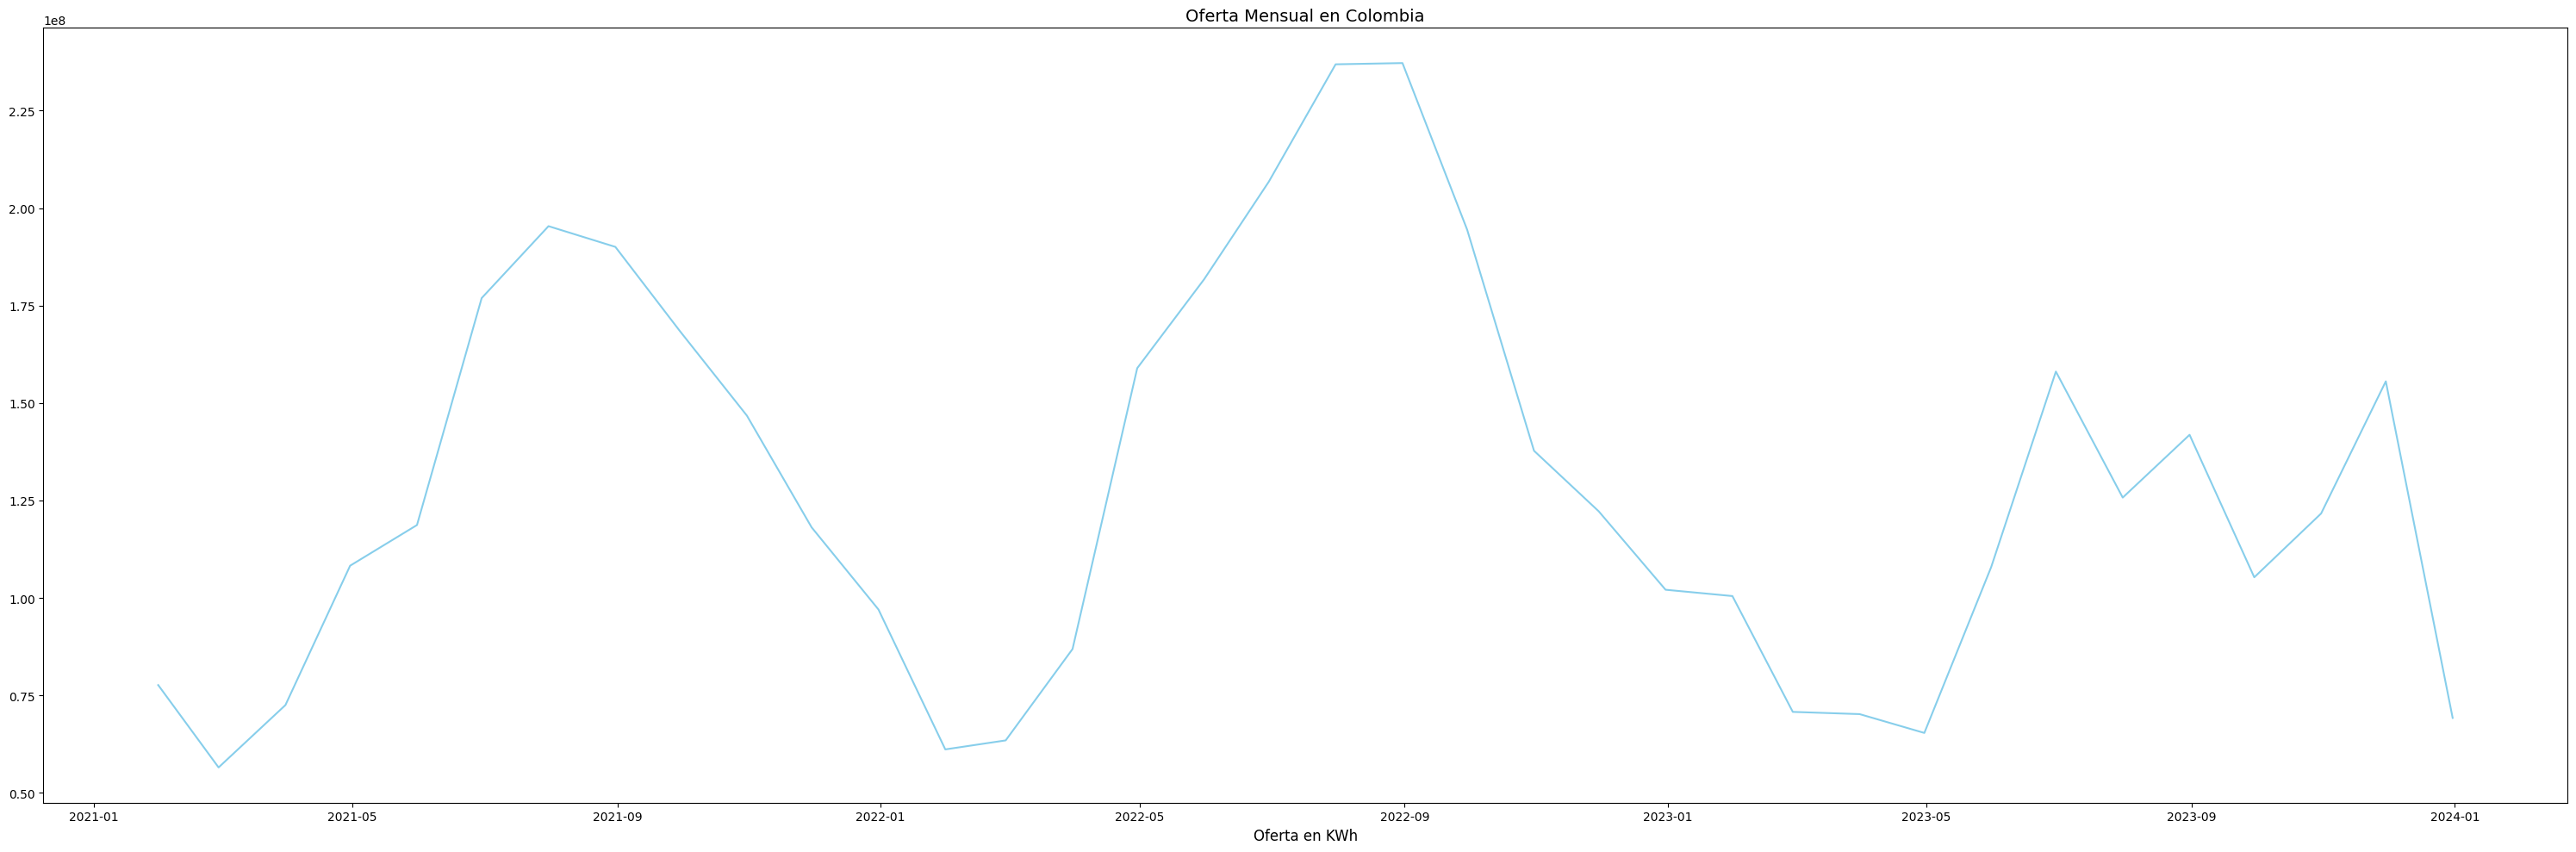

In [41]:
%matplotlib inline

#df_mensual = df_mensual.reset_index()

df_recurso['Mes'] = df_recurso['Date'].dt.strftime('%Y-%m')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(30, 10))

# Graficar la demanda mensual en un gráfico de barras horizontales
ax.plot(df_recurso['Date'], df_recurso['oferta_diaria'], color='skyblue')

# Añadir etiquetas de los ejes
ax.set_xlabel('Oferta en KWh', fontsize=12)
#ax.set_ylabel('Región', fontsize=12)

# Añadir título al gráfico
ax.set_title('Oferta Mensual en Colombia', fontsize=14)

# Ajustar la rotación de las etiquetas del eje y para mejor legibilidad
plt.yticks(rotation=0)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Demanda Diaria (Entre los Años 2021 y 2023)**

In [42]:
# Asegúrate de que la columna 'Date' esté en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Suma de la demanda por horas (diaria)
df['oferta_diaria'] = df.sum(axis=1, skipna=True, numeric_only=True)

# Agrupar por mes y sumar la demanda diaria
df_diaria = df.groupby([pd.Grouper(key='Date', freq='D'), 'Values_code'])['oferta_diaria'].sum() 

df_diaria = df_diaria.reset_index()
df_region_diario = df_diaria

# Definir la región específica a seleccionar
#recursos = ["2VJS", "3ENA", "3ENE", "3GPZ", "3HBN", 
#            "3HF5", "3HWM", "3IZ6", "3J2B", "3IS2", "3J2H", 
#           "3J4D", "3K6T", "3KJK", "3NLZ", "CTG1", "CTG2", "CTG3", 
#            "EPFV", "GE32", "GEC3", "MATA", "PRG1", "PRG2", "TBQ3", 
#           "TBQ4", "TBST", "TCBE", "TCDT", "TFL1", "TFL4", "TGJ1", "TGJ2", "TMB1","TRN1","URA1"]

# Filtrar el DataFrame por la región específica
#df_region_diario = df_diaria[df_diaria['Values_code'].isin(recursos)]

C:\Users\jonal\AppData\Local\Temp\ipykernel_15324\1432688530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\jonal\AppData\Local\Temp\ipykernel_15324\1432688530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oferta_diaria'] = df.sum(axis=1, skipna=True, numeric_only=True)


Función Filtro de Fechas

In [43]:
# Función de filtro de fechas corregida
def fecha_t (ini, fin):
    # Filtrar el DataFrame por el rango de fechas y las regiones específicas
    df_filtrado = df_region_diario[(df_region_diario['Date'] >= ini) & 
                                   (df_region_diario['Date'] <= fin) & 
                                   (df_region_diario['Values_code'].isin(recursos))]

    # Sumar la demanda diaria de ambas regiones en cada fecha
    df_combinado = df_filtrado.groupby('Date')['oferta_diaria'].sum().reset_index()

    # Establecer 'Date' como índice
    df_combinado.set_index('Date', inplace=True)
    
    return df_combinado


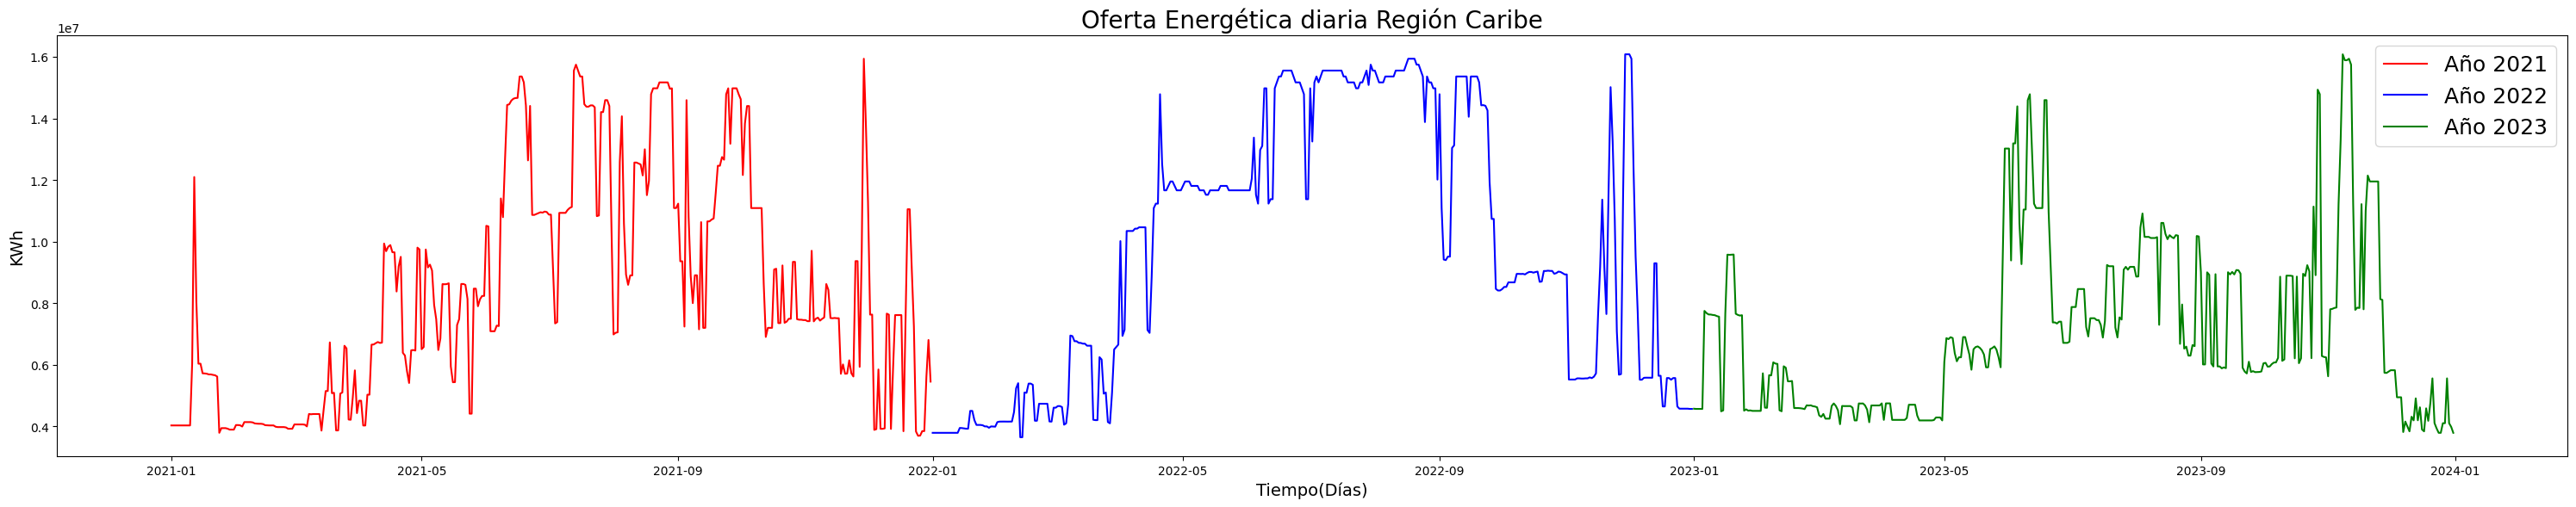

In [44]:
# Crear la figura y el eje
fig, ax = plt.subplots(1,1, figsize=(30, 6))


#for region in regiones_especificas_2021:

ax.plot(fecha_t('2021-01-01','2021-12-31').index, fecha_t('2021-01-01','2021-12-31')['oferta_diaria'], color="r", label='Año 2021')
ax.plot(fecha_t('2022-01-01','2022-12-31').index, fecha_t('2022-01-01','2022-12-31')['oferta_diaria'], color="b", label='Año 2022')
ax.plot(fecha_t('2023-01-01','2023-12-31').index, fecha_t('2023-01-01','2023-12-31')['oferta_diaria'], color="g", label='Año 2023')

# Añadir etiquetas de los ejes
ax.set_xlabel('Tiempo(Días)', fontsize=14)
ax.set_ylabel('KWh', fontsize=14)
# Añadir título al gráfico
ax.set_title('Oferta Energética diaria Región Caribe', fontsize=20)
ax.legend(fontsize=18)
# Ajustar la rotación de las etiquetas del eje y para mejor legibilidad
plt.yticks(rotation=0)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [45]:
# Función de filtro de fechas corregida
def fecha_f (ini, fin):
    # Filtrar el DataFrame por el rango de fechas y las regiones específicas
    df_filtrado = df_region_diario[(df_region_diario['Date'] >= ini) & 
                                   (df_region_diario['Date'] <= fin) & 
                                   (df_region_diario['Values_code'].isin(recursos))]

    # Sumar la demanda diaria de ambas regiones en cada fecha
    df_combinado = df_filtrado.groupby('Date')['oferta_diaria'].sum().reset_index()

    # Establecer 'Date' como índice
    df_combinado.set_index('Date', inplace=False)
    
    return df_combinado

In [46]:
exportar = fecha_f('2021-01-01', '2023-12-31')

exportar.to_csv('oferta_diaria_regresion2.txt', sep='\t', index=False)

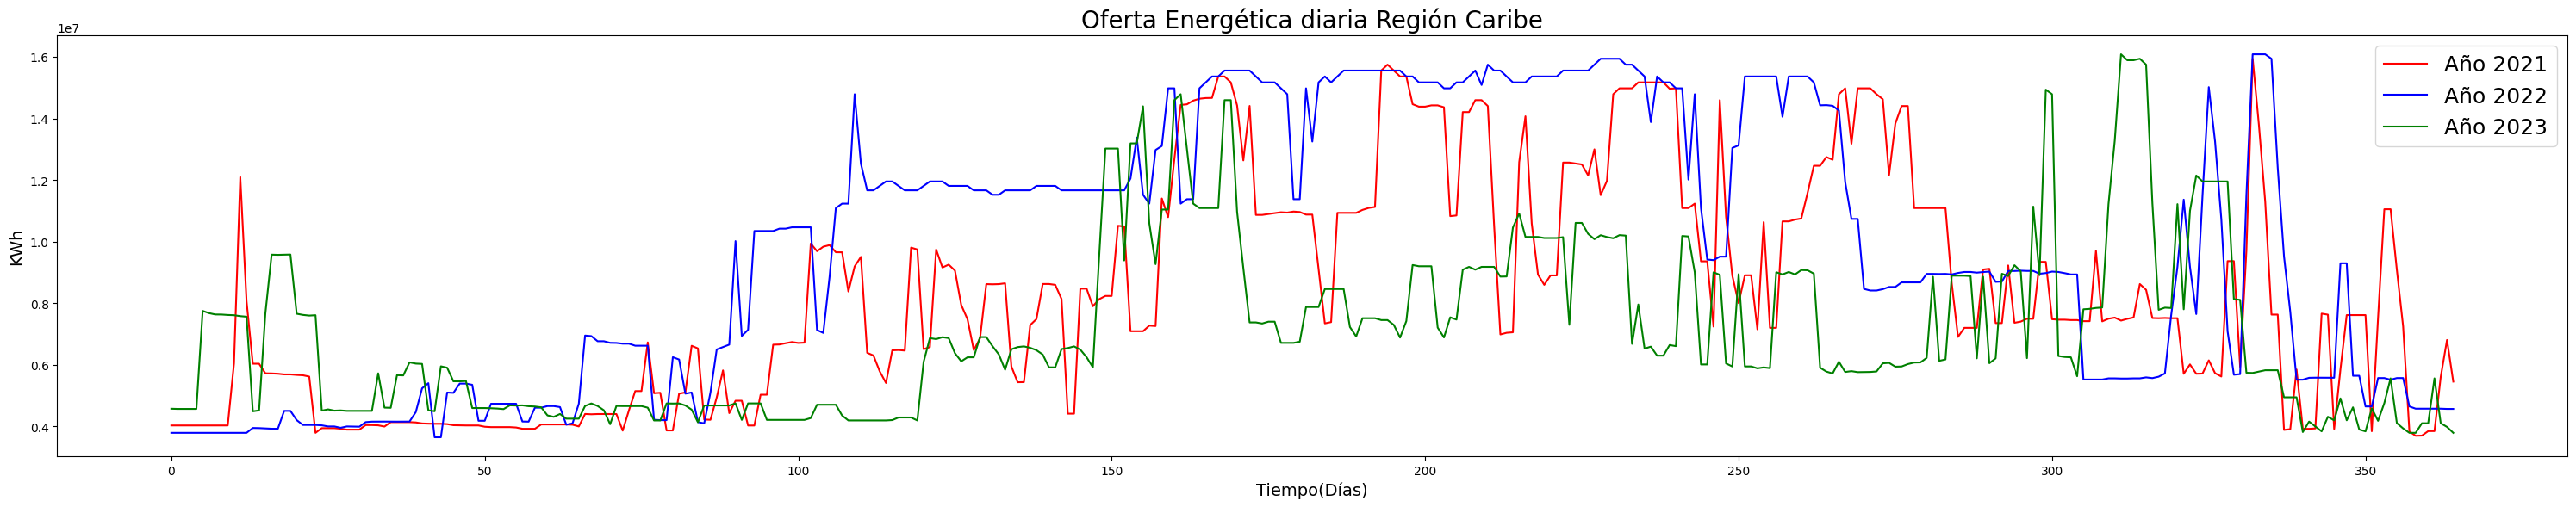

In [47]:
# Crear la figura y el eje
fig, ax = plt.subplots(1,1, figsize=(30, 6))


#for region in regiones_especificas_2021:

ax.plot(fecha_f('2021-01-01','2021-12-31').index, fecha_f('2021-01-01','2021-12-31')['oferta_diaria'], color="r", label='Año 2021')
ax.plot(fecha_f('2022-01-01','2022-12-31').index, fecha_f('2022-01-01','2022-12-31')['oferta_diaria'], color="b", label='Año 2022')
ax.plot(fecha_f('2023-01-01','2023-12-31').index, fecha_f('2023-01-01','2023-12-31')['oferta_diaria'], color="g", label='Año 2023')

# Añadir etiquetas de los ejes
ax.set_xlabel('Tiempo(Días)', fontsize=14)
ax.set_ylabel('KWh', fontsize=14)
# Añadir título al gráfico
ax.set_title('Oferta Energética diaria Región Caribe', fontsize=20)
ax.legend(fontsize=18)
# Ajustar la rotación de las etiquetas del eje y para mejor legibilidad
plt.yticks(rotation=0)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

